# Delineation heatmap

In [1]:
import numpy as np
import SimpleITK as sitk
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sys
"../scripts" not in sys.path and sys.path.insert(0, '../scripts')
import read_scans_utils

In [2]:
pkls_path = "../data/pkl_preprocessed/"
patients_loader = read_scans_utils.load_patients_from_pickle(pkls_path)

In [3]:
first_patient = next(patients_loader)

In [10]:
second_patient = next(patients_loader)

In [12]:
import nilearn.image as ni_im

In [17]:
original_t2 = first_patient.axialt2
first_patient_delineation = first_patient.model_data["region_delineation"]
print(first_patient_delineation.shape)

print("########\n")

second_patient_delineation = second_patient.model_data["region_delineation"]
print(second_patient_delineation.shape)

(512, 512, 7)
########

(720, 720, 3)


In [25]:
print(np.unique(second_patient_delineation.get_fdata()[:, :, 0]))

[0. 1. 2. 3.]


In [21]:
np.set_printoptions(threshold=sys.maxsize)


In [28]:
for i, row in enumerate(second_patient_delineation.get_fdata()[:, :, 0]):
    if 1 in row or 2 in row or 3 in row:
        print(i)
        print(row)
        print()

330
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [18]:
resampled_image = ni_im.resample_to_img(second_patient_delineation, first_patient_delineation)
print(resampled_image.shape)

(512, 512, 7)


### Creating the density mappings

In [5]:
density_mapping_gg3 = np.zeros_like(first_patient.model_data["region_delineation"].get_fdata())
density_mapping_gg4 = np.zeros_like(first_patient.model_data["region_delineation"].get_fdata())
density_mapping_crib = np.zeros_like(first_patient.model_data["region_delineation"].get_fdata())

### Plotting

In [6]:
def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"

    mycmap = cmap
    mycmap._init()
    mycmap._lut[:,-1] = np.linspace(0, 0.8, N+4)
    return mycmap

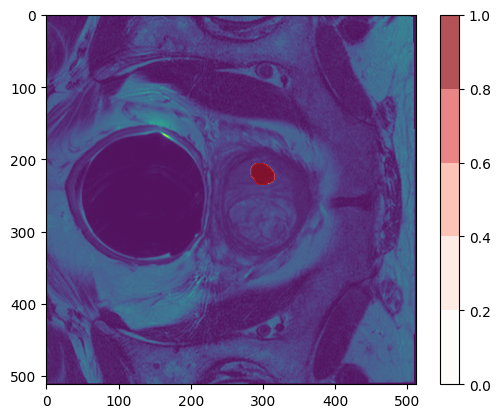

In [9]:
fig, ax = plt.subplots(1, 1)
ax.imshow(original_t2.get_fdata()[:, :, 15])
transparent_heatmap = transparent_cmap(plt.cm.Reds)

w, h = original_t2.get_fdata()[:, :, 15].shape
y, x = np.mgrid[0:h, 0:w]


# cb = ax.contourf(x, y, first_patient_delineation, 5, cmap = transparent_heatmap)
cb = ax.contourf(x, y, first_patient_delineation, 5, cmap = plt.cm.Reds)

plt.colorbar(cb)
plt.show()